In [1]:
import utils
from matplotlib import pyplot as plt
import fastf1
import pandas as pd
from datetime import timedelta, datetime

In [2]:
magColor = fastf1.plotting.driver_color("mag")
verColor = fastf1.plotting.driver_color("ver")

In [4]:
session = fastf1.get_session(2022, 21, 'Q')
session.load(laps=True, telemetry=True, weather=True)
laps = session.laps

q1, q2, q3 = laps.split_qualifying_sessions()

fast_mag = q3.pick_driver('MAG')

fast_ver = q3.pick_driver('VER')

core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.0.0]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['20', '1', '63', '4', '55', '31', '14', '44', '11', '16', '23', '10', '5', '3', '18', '6', '24', '77', '22', '47']


In [5]:
best_lap_mag, best_lap_ver = utils.get_qualifying_laps_for_mag_and_ver(q3)

In [6]:
df_weather = pd.read_csv("data/q3_wheater.csv")
track_status = session.track_status
yellow_flag = track_status[track_status["Message"] == "Yellow"]
yellow_time = utils.convert_delta_to_time(yellow_flag["Time"])

red_flag = track_status[track_status["Message"] == "Red"].iloc[0]
red_time = utils.convert_delta_to_time(red_flag["Time"])

allClear = track_status[track_status["Message"] == "AllClear"]
allClear_time = utils.convert_delta_to_time(allClear["Time"])
allClearAfterRed = allClear.iloc[-1]
allClearAfterRed_time = utils.convert_delta_to_time(allClearAfterRed["Time"])


In [7]:
q_time_delta_0_date = session.event.Session2Date

In [8]:
## Q3 start and end time
q3_end = session.session_status.iloc[-2]["Time"]
q3_end_time = q3_end + q_time_delta_0_date
q3_start = session.session_status.iloc[7]["Time"]
q3_start_time = q3_start + q_time_delta_0_date

In [37]:
## rain start time
df_sorted = df_weather[["Time", "Rainfall"]].sort_values("Time") 
rain_start = df_sorted[df_sorted["Rainfall"]].iloc[0]["Time"]

date_time = utils.convert_string_to_time(rain_start)
total_seconds = date_time.hour * 3600 + date_time.minute * 60 + date_time.second
rain_start_time = timedelta(seconds=total_seconds) + q_time_delta_0_date

In [20]:
## get track status
track_status = session.track_status.copy()

## convert to datetime
track_status["Time"] = track_status["Time"] + q_time_delta_0_date

## get best lap time
q_lap_mag = fast_mag.pick_lap(utils.MAG_QUALIFYING_LAP).get_car_data()
q_lap_ver = fast_ver.pick_lap(utils.VER_QUALIFYING_LAP).get_car_data()

## convert to datetime
q_lap_mag_start = q_lap_mag.iloc[0]["SessionTime"] + q_time_delta_0_date
q_lap_ver_start = q_lap_ver.iloc[0]["SessionTime"] + q_time_delta_0_date

## create rows 
q3_start_time_row = [q3_start_time, 10, "Q3Start"]
q3_end_time_row = [q3_end_time, 10, "Q3End"]
q_lap_mag_start_row = [q_lap_mag_start, 10, "Q3LapMagStart"]
q_lap_ver_start_row = [q_lap_ver_start, 10, "Q3LapVerStart"]
rain_start_time_row = [rain_start_time, 10, "RainStart"]

## add rows to track status dataframe
track_status.loc[track_status.shape[0]] = rain_start_time_row
track_status.loc[track_status.shape[0]] = q3_start_time_row
track_status.loc[track_status.shape[0]] = q3_end_time_row
track_status.loc[track_status.shape[0]] = q_lap_mag_start_row
track_status.loc[track_status.shape[0]] = q_lap_ver_start_row



In [22]:
track_status.to_csv("data/track_status.csv", index=False)

In [12]:
## pick qualifying lap 
q_lap_mag = fast_mag.pick_lap(utils.MAG_QUALIFYING_LAP).get_car_data()
q_lap_ver = fast_ver.pick_lap(utils.VER_QUALIFYING_LAP).get_car_data()

## make session time to datetime
q_lap_mag["SessionTime"] = q_lap_mag["SessionTime"] + q_time_delta_0_date
q_lap_ver["SessionTime"] = q_lap_ver["SessionTime"] + q_time_delta_0_date

## drop unnecessary columns
columns_to_drop = ["nGear","Brake","DRS","Source", "RPM"]
q_lap_mag = q_lap_mag.drop(columns=columns_to_drop)
q_lap_ver = q_lap_ver.drop(columns=columns_to_drop)

In [13]:
q_lap_ver

,Date,Speed,Throttle,Time,SessionTime
0,2022-11-11 19:49:37.410,324,100,0 days 00:00:00.185000,2022-11-11 17:03:32.620000-03:00
1,2022-11-11 19:49:37.650,325,100,0 days 00:00:00.425000,2022-11-11 17:03:32.860000-03:00
2,2022-11-11 19:49:37.810,326,100,0 days 00:00:00.585000,2022-11-11 17:03:33.020000-03:00
3,2022-11-11 19:49:38.010,326,100,0 days 00:00:00.785000,2022-11-11 17:03:33.220000-03:00
4,2022-11-11 19:49:38.170,327,100,0 days 00:00:00.945000,2022-11-11 17:03:33.380000-03:00
...,...,...,...,...,...
259,2022-11-11 19:50:48.011,321,100,0 days 00:01:10.786000,2022-11-11 17:04:43.221000-03:00
260,2022-11-11 19:50:48.171,322,100,0 days 00:01:10.946000,2022-11-11 17:04:43.381000-03:00
261,2022-11-11 19:50:48.531,323,100,0 days 00:01:11.306000,2022-11-11 17:04:43.741000-03:00
262,2022-11-11 19:50:48.771,324,100,0 days 00:01:11.546000,2022-11-11 17:04:43.981000-03:00


In [14]:
## merge dataframes
q_laps = pd.merge(q_lap_mag, q_lap_ver, on="SessionTime", suffixes=("_mag", "_ver"), how="outer")
q_laps.to_csv("data/q3_laps.csv", index=False)

In [15]:
min_time = df_weather["Time"].min()
min_time = utils.convert_string_to_time(min_time)
max_time = df_weather["Time"].max()
max_time = utils.convert_string_to_time(max_time)
td_5sec = timedelta(seconds=5)

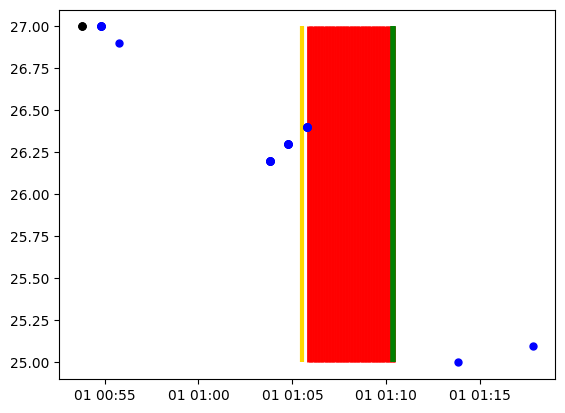

In [16]:
## track temp over time
fig, ax = plt.subplots()
ax.xaxis.axis_date()

red_flag = track_status[track_status["Message"] == "Red"].iloc[0]
red_time = utils.convert_delta_to_time(red_flag["Time"])

ax.vlines(x=yellow_time, ymin=25, ymax=27, color="gold", linewidth=3)
while red_time < allClearAfterRed_time:
    red_time += td_5sec
    ax.vlines(x=red_time, ymin=25, ymax=27, color="red", linewidth=2)
ax.vlines(x=allClearAfterRed_time, ymin=25, ymax=27, color="green", linewidth=4)

for idx, _  in enumerate(df_weather.index):

    isRainfall = df_weather.iloc[idx]["Rainfall"]
    timeString = df_weather.iloc[idx]["Time"]
    trackTemp = df_weather.iloc[idx]["TrackTemp"]
    timeStamp = utils.convert_string_to_time(timeString)
    ax.plot(timeStamp, trackTemp, c="blue" if isRainfall else "black",  marker="o", markersize=5)

In [17]:
best_lap_mag_date_time = best_lap_mag["Time"].apply(utils.convert_delta_to_time)
best_lap_ver_date_time = best_lap_ver["Time"].apply(utils.convert_delta_to_time) 

[None, None, None, None, None, None, None, None]

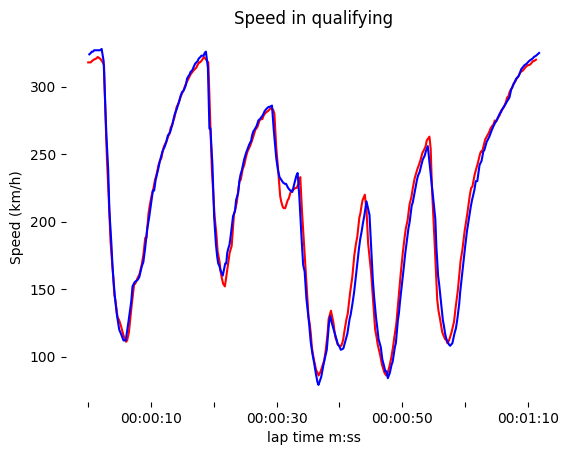

In [18]:
fig, ax = plt.subplots()
ax.plot(best_lap_mag_date_time, best_lap_mag["Speed"], c="red")
ax.plot(best_lap_ver_date_time, best_lap_ver["Speed"], c="blue")
ax.set_xlabel("lap time m:ss")
ax.set_ylabel("Speed (km/h)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.axis_date()

ax.set_title("Speed in qualifying")
plt.setp(ax.get_xticklabels()[::2], visible=False)